# Importing Labraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
df=pd.read_csv('Car Dataset.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Basic Data Info

In [3]:
print('Dataframe shape: ',df.shape)

Dataframe shape:  (11914, 16)


In [4]:
print('Dataframe Info:-')
df.info()

Dataframe Info:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: fl

In [5]:
print('Dataframe Statistics (numerical columns):-')
df.describe().T

Dataframe Statistics (numerical columns):-


,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


In [6]:
print('Dataframe Statistics (Object columns):-')
df.describe(include='object').T

Dataframe Statistics (Object columns):-


,count,unique,top,freq
Make,11914,48,Chevrolet,1123
Model,11914,915,Silverado 1500,156
Engine Fuel Type,11911,10,regular unleaded,7172
Transmission Type,11914,5,AUTOMATIC,8266
Driven_Wheels,11914,4,front wheel drive,4787
Market Category,8172,71,Crossover,1110
Vehicle Size,11914,3,Compact,4764
Vehicle Style,11914,16,Sedan,3048


In [7]:
print('Unique count per column:-')
df.nunique()

Unique count per column:-


Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [8]:
print('Nulls count per column:-')
df.isnull().sum()

Nulls count per column:-


Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [9]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

# EDA & Data Cleaning

### Normalizing the Target Column

<Axes: xlabel='MSRP', ylabel='Count'>

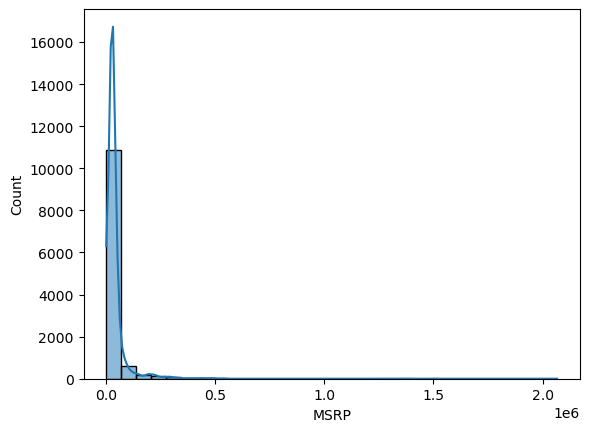

In [10]:
sns.histplot(df['MSRP'],kde=True,bins=30)

#### The target distribution shows significant right-skewness. 

#### Takeways:
#### 1.Majority of vehicles are concentrated in a single dominant bin at the lower end.
#### 2.The right tail stretches, with some high-priced outliers likely representing exotic vehicles.
#### 3.Distribution deviates considerably from normality. We will apply log transformation.

In [11]:
df['MSRP_Log']=np.log1p(df['MSRP'])

<Axes: xlabel='MSRP_Log', ylabel='Count'>

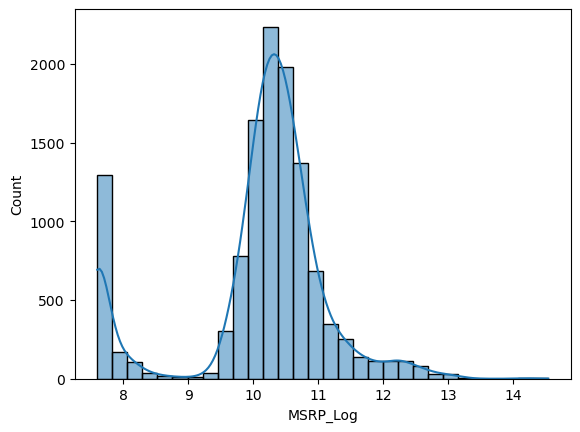

In [12]:
sns.histplot(df['MSRP_Log'],kde=True,bins=30)

<Axes: >

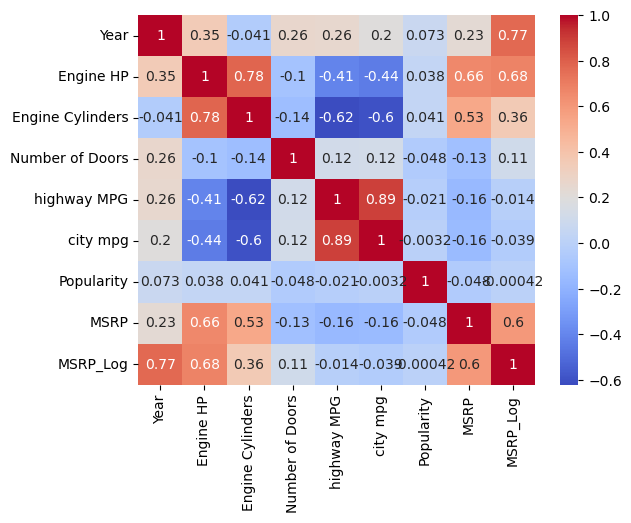

In [13]:
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True,cmap='coolwarm')

### Handling the null values

Skewed:  1.291229813313272



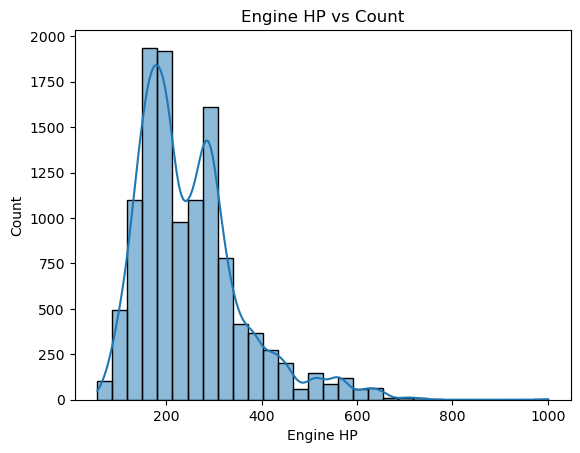

In [14]:
sns.histplot(df['Engine HP'],bins=30,kde=True)
print('Skewed: ',df['Engine HP'].skew())
print()
plt.title('Engine HP vs Count')
plt.show()
#Since this is skewed so for this column we will handle nulls using median
df['Engine HP'].fillna(df['Engine HP'].median(), inplace=True)

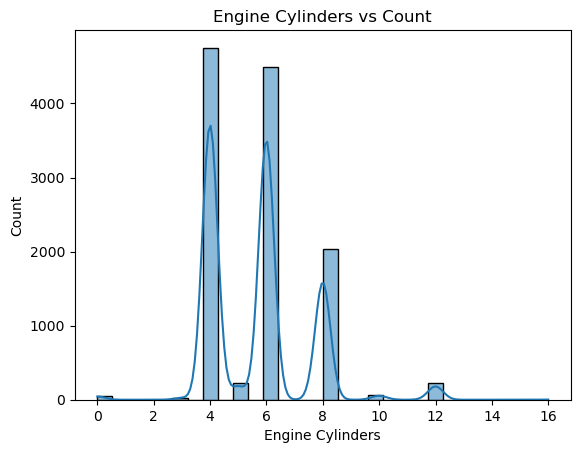

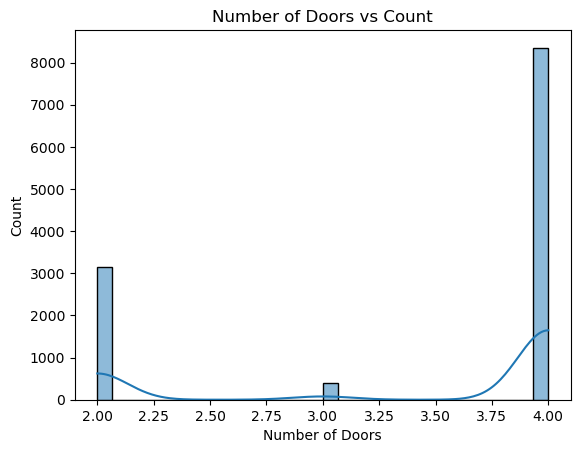

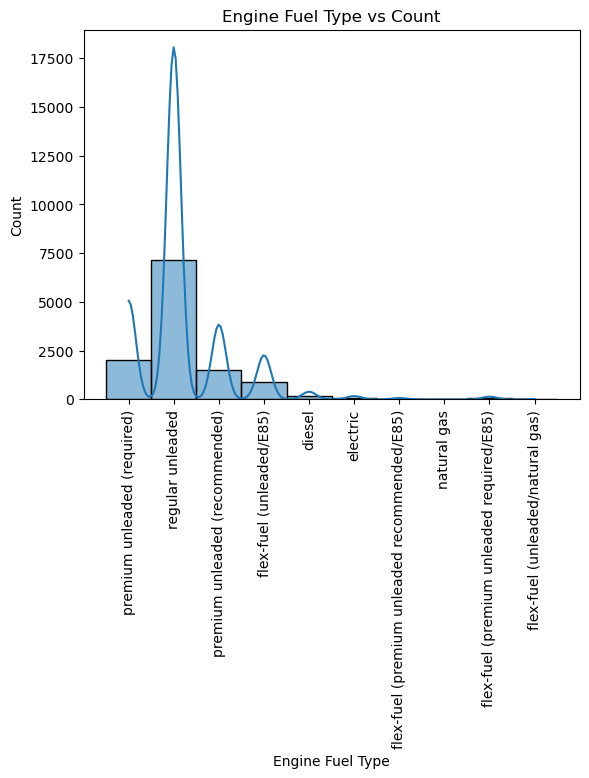

In [15]:
sns.histplot(df['Engine Cylinders'],bins=30,kde=True)
plt.title('Engine Cylinders vs Count')
plt.show()

print()

sns.histplot(df['Number of Doors'],bins=30,kde=True)
plt.title('Number of Doors vs Count')
plt.show()

print()

sns.histplot(df['Engine Fuel Type'],bins=30,kde=True)
plt.title('Engine Fuel Type vs Count')
plt.xticks(rotation=90)
plt.show()




#Since these act as categorical so we will use mode for the null values
df['Engine Cylinders'].fillna(df['Engine Cylinders'].mode()[0], inplace=True)
df['Number of Doors'].fillna(df['Number of Doors'].mode()[0], inplace=True)
df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)

In [16]:
#Dropping 'Market Category' since this column has a lot of nulls
df.drop('Market Category',axis=1,inplace=True)

### Visual EDA

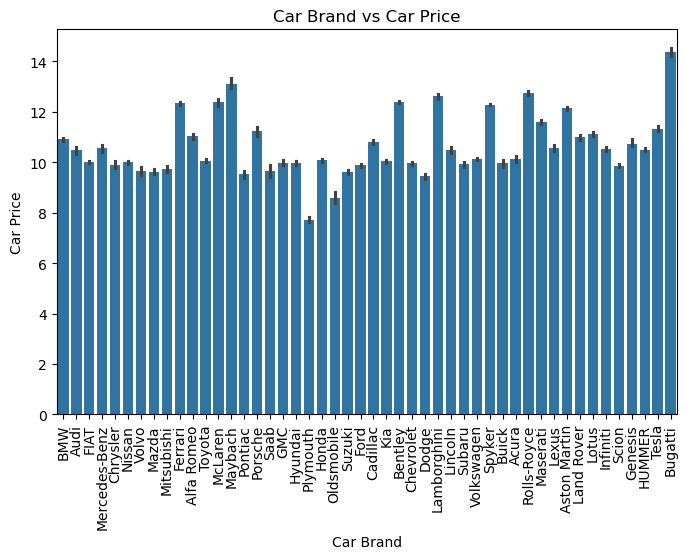

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='Make',y='MSRP_Log',data=df)
plt.title('Car Brand vs Car Price')
plt.ylabel('Car Price')
plt.xlabel('Car Brand')
plt.xticks(rotation=90)
plt.show()

In [18]:
#dropping 'Model' for now can't be directly encoded maybe we can use nlp for this
df.drop('Model',axis=1,inplace=True)

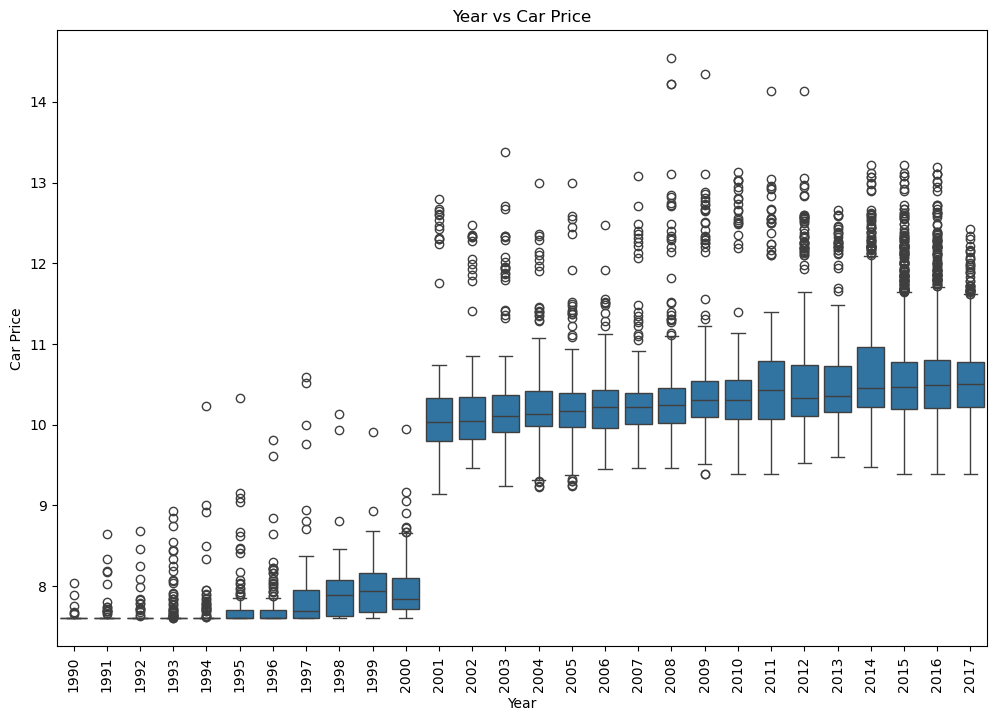

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Year',y='MSRP_Log',data=df)
plt.title('Year vs Car Price')
plt.ylabel('Car Price')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show()

In [20]:
# sns.barplot(x='Engine Fuel Type',y='MSRP_Log',data=df)
# plt.title('Engine Fuel Type vs Car Price')
# plt.ylabel('Car Price')
# plt.xlabel('Engine Fuel Type')
# plt.xticks(rotation=90)
# plt.show()

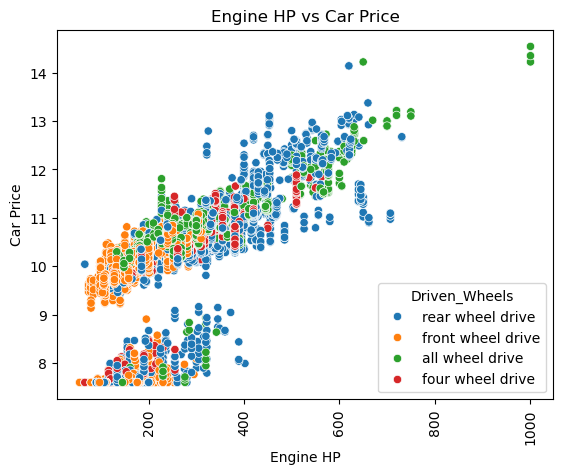

In [21]:
# plt.figure(figsize=(12,8))
sns.scatterplot(x='Engine HP',y='MSRP_Log',data=df,hue='Driven_Wheels')
plt.title('Engine HP vs Car Price')
plt.ylabel('Car Price')
plt.xlabel('Engine HP')
plt.xticks(rotation=90)
plt.show()

In [22]:
# # plt.figure(figsize=(12,8))
# sns.violinplot(x='Engine Cylinders',y='MSRP_Log',data=df)
# plt.title('Engine Cylinders vs Car Price')
# plt.ylabel('Car Price')
# plt.xlabel('Engine Cylinders')
# plt.xticks(rotation=90)
# plt.show()

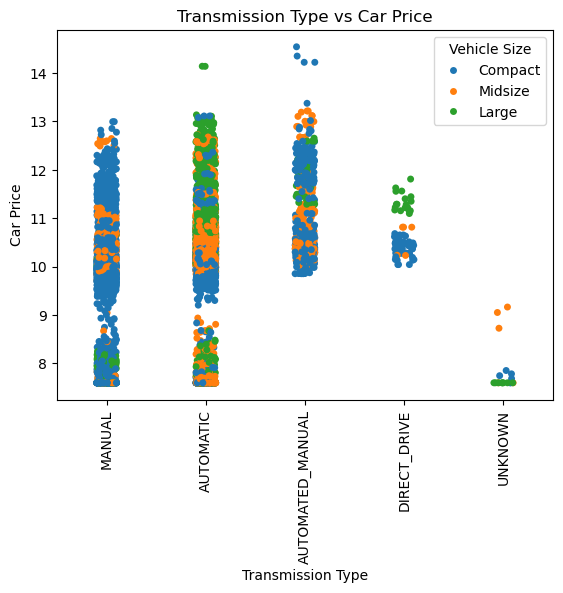

In [23]:
sns.stripplot(x='Transmission Type',y='MSRP_Log',data=df,hue='Vehicle Size')
plt.title('Transmission Type vs Car Price')
plt.ylabel('Car Price')
plt.xlabel('Transmission Type')
plt.xticks(rotation=90)
plt.show()

In [24]:
# # plt.figure(figsize=(12,8))
# sns.boxplot(x='Driven_Wheels',y='MSRP_Log',data=df)
# plt.title('Driven_Wheels vs Car Price')
# plt.ylabel('Car Price')
# plt.xlabel('Driven_Wheels')
# plt.xticks(rotation=90)
# plt.show()

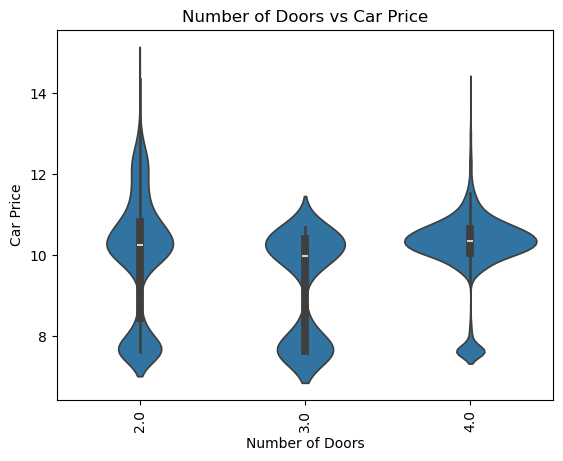

In [25]:
# plt.figure(figsize=(12,8))
sns.violinplot(x='Number of Doors',y='MSRP_Log',data=df)
plt.title('Number of Doors vs Car Price')
plt.ylabel('Car Price')
plt.xlabel('Number of Doors')
plt.xticks(rotation=90)
plt.show()

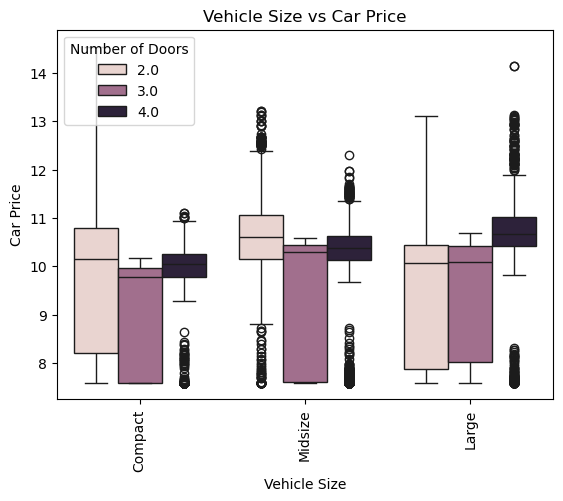

In [26]:
# plt.figure(figsize=(12,8))
sns.boxplot(x='Vehicle Size',y='MSRP_Log',data=df,hue='Number of Doors')
plt.title('Vehicle Size vs Car Price')
plt.ylabel('Car Price')
plt.xlabel('Vehicle Size')
plt.xticks(rotation=90)
plt.show()

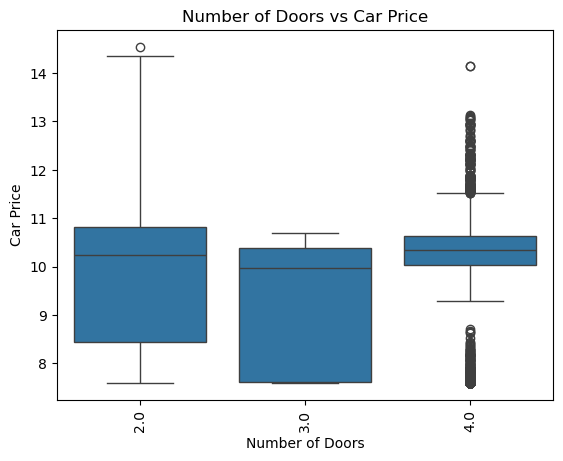

In [27]:
# plt.figure(figsize=(12,8))
sns.boxplot(x='Number of Doors',y='MSRP_Log',data=df)
plt.title('Number of Doors vs Car Price')
plt.ylabel('Car Price')
plt.xlabel('Number of Doors')
plt.xticks(rotation=90)
plt.show()

In [28]:
# # plt.figure(figsize=(12,8))
# sns.scatterplot(x='highway MPG',y='MSRP_Log',data=df)
# plt.title('highway MPG vs Car Price')
# plt.ylabel('Car Price')
# plt.xlabel('highway MPG')
# plt.xticks(rotation=90)
# plt.show()

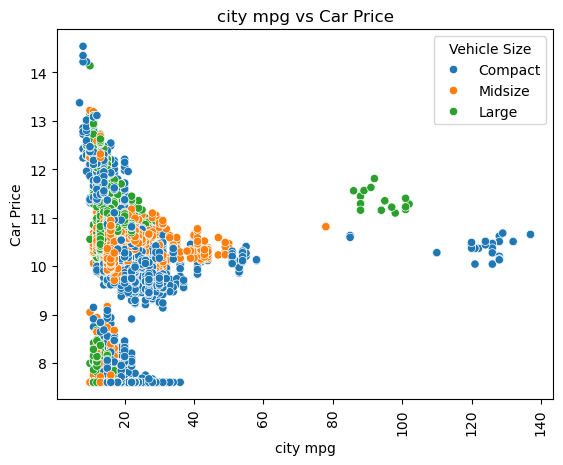

In [29]:
# plt.figure(figsize=(12,8))
sns.scatterplot(x='city mpg',y='MSRP_Log',data=df,hue='Vehicle Size')
plt.title('city mpg vs Car Price')
plt.ylabel('Car Price')
plt.xlabel('city mpg')
plt.xticks(rotation=90)
plt.show()

In [30]:
# # plt.figure(figsize=(12,8))
# sns.scatterplot(x='Popularity',y='MSRP_Log',data=df)
# plt.title('Popularity vs Car Price')
# plt.ylabel('Car Price')
# plt.xlabel('Popularity')
# plt.xticks(rotation=90)
# plt.show()

# Data Preprocessing

In [31]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [32]:
#Spliting Features and Target
X = df.drop(['msrp', 'msrp_log'], axis=1)
y = df['msrp_log']

In [33]:
#Splitting into Train and test dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [34]:
#Identifying and dividing into feature types
cat_features=['make','year','engine_fuel_type','engine_cylinders','transmission_type','driven_wheels','number_of_doors','vehicle_size','vehicle_style']
num_features=['engine_hp','highway_mpg','city_mpg','popularity']
text_features=[]

# Feature Engineering & Feature Scaling

In [35]:
#Combining preprocessing steps using ColumnTransformer
for col in cat_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

preprocessor=ColumnTransformer(transformers=[
    ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_features),
    ('num',StandardScaler(),num_features)
])

# Wrap It in a Pipeline with a Model
pipeline=Pipeline(steps=[
    ('preprocess',preprocessor),
    ('regressor',LinearRegression())
])

# Model Training and Evaluation

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Train model
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

In [37]:
# Convert predictions back from log scale
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)

# Evaluation Metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"MSE: ${mse:.2f}")
print(f"MAE: ${mae:.2f}")
print(f"RMSE: ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")


MSE: $224727786.30
MAE: $5658.98
RMSE: $14990.92
R² Score: 0.9057


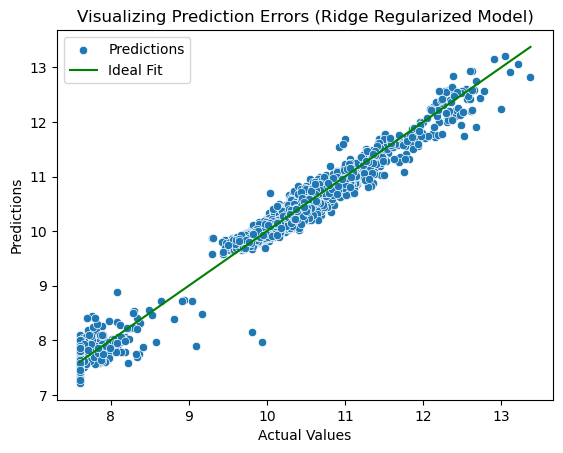

In [38]:
plt.figure()
sns.scatterplot(x=y_test, y=y_pred, label="Predictions")
sns.lineplot(x=y_test, y=y_test, color="g", label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.title("Visualizing Prediction Errors (Ridge Regularized Model)")
plt.show()

# Save Model & Prediction Function (for Flask API use)

In [39]:
 import joblib

# Save the full pipeline (includes preprocessing + model)
joblib.dump(pipeline, 'car_price_model.pkl')
print("Model saved to car_price_model.pkl")


Model saved to car_price_model.pkl


### Sample Prediction

In [41]:
def predict_price(input_dict):
    """
    Predicts MSRP given a dictionary of car features.
    .
    .
    .
    Returns:
        float: Predicted MSRP in dollars
    """
    # Convert input to DataFrame
    input_df = pd.DataFrame([input_dict])
    
    # Predict log MSRP
    log_price = pipeline.predict(input_df)[0]
    
    # Convert back to actual price
    return round(np.expm1(log_price), 2)


In [48]:
sample_input = {
    'make': 'Honda',
    'model': 'Civic',
    'year': '2016',
    'engine_fuel_type': 'regular unleaded',
    'engine_hp': 158,
    'engine_cylinders': '4',
    'transmission_type': 'automatic',
    'driven_wheels': 'front_wheel_drive',
    'number_of_doors': '4'  ,
    'vehicle_size': 'compact',
    'vehicle_style': 'sedan',
    'highway_mpg': 40,
    'city_mpg': 31,
    'popularity': 1385
}

predicted_price = predict_price(sample_input)
print(f"Predicted MSRP: ${predicted_price}")


Predicted MSRP: $22731.91


In [49]:
import flask
import sklearn
import pandas as pd
import numpy as np
import joblib

print("Flask version:", flask.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Joblib version:", joblib.__version__)


Flask version: 3.0.3
Scikit-learn version: 1.5.1
Pandas version: 2.2.2
NumPy version: 1.26.4
Joblib version: 1.4.2
